# Decision Tree

Decision trees are essential components of ensemble machine learning models.
A decision tree uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.


Suppose we want to predict whether it is going to snow tomorrow, and
we look at the historical weather data:

<img src='../figs/13_Capture1.PNG'>

All the snow events happen when the temperature was under 30 and the humidity level was above 70. If we transfer this scatter plot into a decision tree diagram, it should look like something below:

<img src='../figs/13_Capture2.PNG'>

We can predict whether it is going to snow by asking two questions:

1. Is Temperature below 30 ? 
2. Is Humidity above 70 ?

### How Does A Decision Tree Work?

Decision tree can be used for on both regression (continuous target) and classification (categorical target) tasks. 

* defined by a hierarchy of rules in form of a tree

* rules form the internel decision nodes

* decision nodes at the ends of tree are leaves

**Decision tree classification consists three steps:**

1. Grow the tree: split the nodes by setting rules. Training data is used to construct/fit the decision tree model

2. Prune the tree: remove the unnecessary splits to prevent overfitting

3. Prediction: go through the nodes from root to leaf
   - for classification, predict the sample as the class with the most training samples on the leaf.
   - for regression, the predicted value is the mean of the target values of the training samples on the leaf.

We will be focusing on the rationale behind growing the tree, if you are interested in the pruning the tree please refer to the link in the further reading.

### Decision Tree Splitting

Decision tree splitting is based on the concepts of **uncertainty** and **information gain**.
In a nutshell, **it splits a note by asking a question that leads to the least uncertain answers.**



### Uncertainty Measurement

Two most common measurements for uncertainty are **entropy** and **Gini index**. 
The range of entropy is [0,1] and the range of Gini Index is [0,0.5].
**The lower value of the index, the less uncertainty the splitting node is.** 

**Entropy**

$$
- \sum_{i=1}^K p_i \log p_i
$$
where $K$ is the number of classes.

Let's calculate the entropy for the following two examples:

<img src='../figs/13_Capture6.PNG'>

**Gini Index**

$$
1-\sum_{i=1}^K p_i^2
$$

Let's calculate the Gini Index for the same examples:

<img src='../figs/13_Capture8.PNG'>

### Information Gain

Information gain at a splitting node is defined as the uncertainty of the parent node minus the combined uncertainties of the children nodes. Maximizing the information gain is the key for growing a decision tree. Both entropy and Gini index can be used as the uncertainty measurement for information gain.


<img src='../figs/13_Capture9.PNG'>


By splitting the tree using a new Question C, the information gain is 0.3974.


### Probabilistic Prediction

Decision trees with pure leaves (decision node) are **prune to overfitting** and outliers. In practice, we build the tree so that leaves are impure, which contain not just a single class estimate, but also a probability estimate as well. This could be done by counting what portion of the predicted labels were correct in each leaf. These are sometimes called "probability estimation trees," and though they don't give perfect probability estimates, they can be useful to mitigate overfitting.

#### Pruning

Pruning processes can be divided into two types (pre- and post-pruning).

* Pre-pruning procedures prevent a complete induction of the training set by replacing a stop criterion in the induction algorithm, e.g. max Tree depth `max_depth`. **If we do not set `max_depth` or similar parameters, then the tree will always keep splitting until every leaf is pure, and all the probabilities will be 1 and gini index or entropy will be 0.**

* Post-pruning (or just pruning) is the most common way of simplifying trees. Here, nodes and subtrees are replaced with leaves to reduce complexity. Pruning can not only significantly reduce the size but also improve the classification accuracy of unseen objects.

### Decision Tree Classifier with Sklearn

Load the Iris data:

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(iris.feature_names)

print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Train-test split:

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
random_state = 42)

Model fitting and prediction:

In [4]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)

Evaluation on test data:

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

1.0

Visualize the trained decision tree. You'll need to install the ``graphviz`` library by
    ``conda install python-graphviz``.

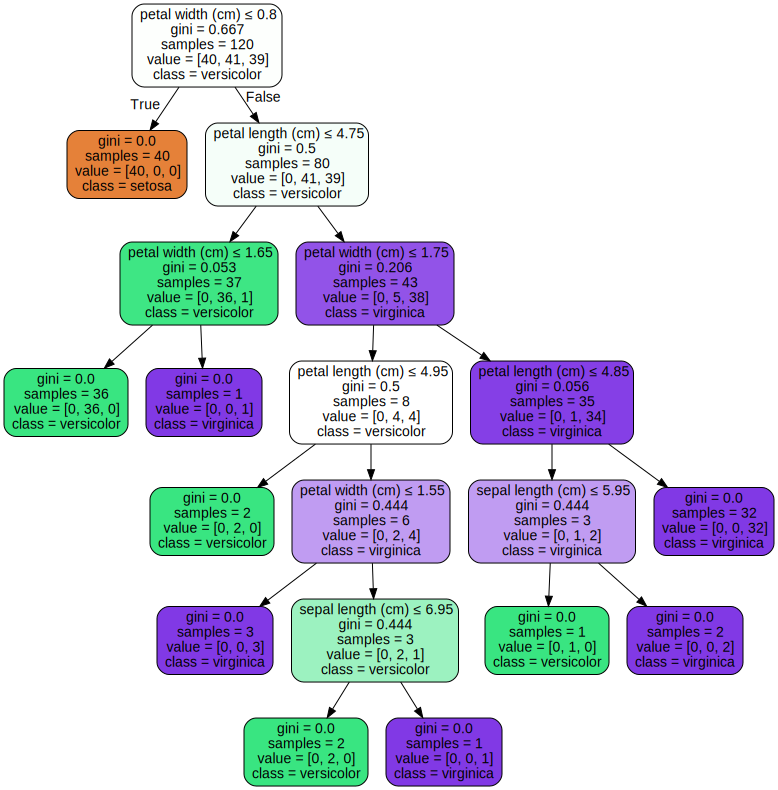

In [6]:
import graphviz 
iris_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graphviz.Source(iris_data)  

The trained tree has pure leaves where all training samples belong to the same class on the same leaf.

### Pre-Pruning

We can pre-prune the tree by setting `max_depth` parameter

In [12]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

1.0

We obtained a decision tree with depth = 4 and perfect prediction, where the leaves are not pure.

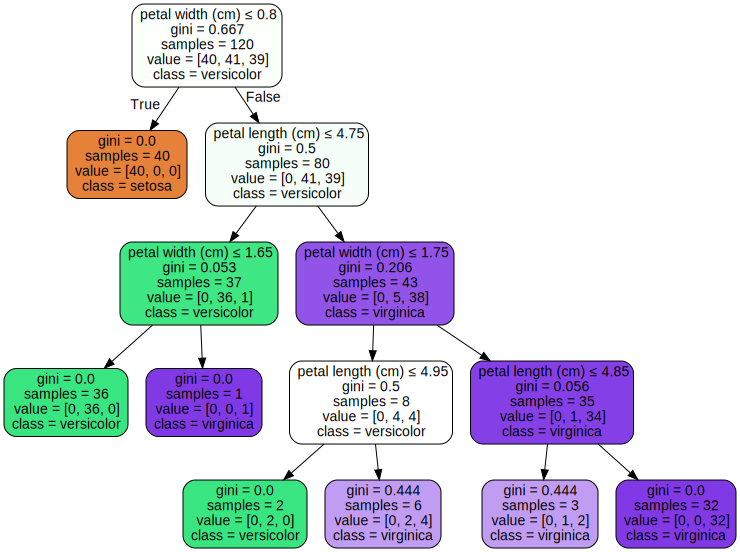

In [13]:
iris_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graphviz.Source(iris_data)

## Further Reading:

Tree Pruning: https://en.wikipedia.org/wiki/Decision_tree_pruning
